In [1]:
!pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 630.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 20.4 MB/s eta

In [2]:
from IPython.display import Markdown
import textwrap

def to_markdown(text):
  text = text.replace('*', ' *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
import google.generativeai as genai
from google.colab import userdata

In [4]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
!pip install langchain

The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123589 files and directories

In [6]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.8 MB/s eta 0:00:00


In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [8]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA



warnings.filterwarnings("ignore")

In [9]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                                google_api_key=GOOGLE_API_KEY,
                               temperature=0.2,
                               convert_system_message_to_human=True)

In [11]:
load_pdf = PyPDFLoader("/content/UUD-1945.pdf")
pages = load_pdf.load_and_split()

In [12]:
pages[5].page_content

'*) : Perubahan Pertama\n**) : Perubahan Kedua\n***) : Perubahan Ketiga\n****) : Perubahan Keempat(7)Keputusan Majelis Permusyawaratan Rakyat atas usul pemberhentian Presiden\ndan/atau Wakil Presiden harus diambil dalam rapat paripurna Majelis\nPermusyawaratan Rakyat yang dihadiri oleh sekurang\xadkurangnya 3/4 dari\njumlah anggota dan disetujui oleh sekurang\xadk urangnya 2/3 dari jumlah anggota\nyang hadir, setelah Presiden dan/atau Wakil Presiden diberi kesempatan\nmenyampaikan penjelasan dalam rapat paripurna Majelis Permusyawaratan\nRakyat. ***)\nPasal 7C\nPresiden tidak dapat membekukan dan/atau membubarkan Dewan Perwakilan\nRakyat.***)\nPasal 8\n(1) Jika Presiden mangkat, berhenti, diberhentikan, atau tidak dapat melakukan\nkewajibannya dalam masa jabatannya, ia digantikan oleh Wakil Presiden sampai\nhabis masa jabatannya. ***)\n(2)Dalam hal terjadi kekosongan Wakil Presiden, selambat\xadlambatnya dalam waktu\nenam puluh hari, Majelis Permusyawaratan Rakyat menyelenggarakan\nsid

In [13]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [14]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=5000, chunk_overlap=500)
context = "\n\n".join(str(p.page_content) for p in pages)
text = text_splitter.split_text(context)

In [15]:
print(context)

UNDANG­UNDANG DASAR
NEGARA REPUBLIK INDONESIA TAHUN 1945
DALAM SATU NASKAH

*) : Perubahan Pertama
**) : Perubahan Kedua
***) : Perubahan Ketiga
****) : Perubahan KeempatUNDANG­UNDANG DASAR NEGARA REPUBLIK INDONESIA
TAHUN 1945
PEMBUKAAN
( P r e a m b u l e )
Bahwa sesungguhnya kemerdekaan itu ialah hak segala bangsa dan oleh sebab
itu, maka penjajahan di atas dunia harus dihapuskan, karena tidak sesuai dengan
peri­kemanusiaan dan peri­keadilan.
Dan perjuangan pergerakan kemerdekaan Indonesia tela h sa mpaila h kepada
saat yang berbahagia dengan selamat sentausa mengantarkan rakyat Indonesia ke
depan pintu gerbang kemerdekaan Negara Indonesia, yang merdeka , bersatu,
berdaulat, adil dan makmur.
Atas berkat rakhmat Allah Yang Maha Kuasa dan dengan didorongkan oleh
keinginan luhur, supaya berkehidupan kebangsaan yang bebas, maka rakyat Indonesia
menyata kan dengan ini kemerdekaannya.
Kemudian dari pada itu untuk membentuk suatu Pemerintah Negara Indonesia
yang melindungi segenap bangsa In

In [16]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=GOOGLE_API_KEY)

In [24]:
vector_index = Chroma.from_texts(text, embeddings).as_retriever(search_kwargs={"k":4})

In [25]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True

)

In [26]:
question = "Jelaskan bagaimana jika Majelis Permusyawaratan Rakyat atau Dewan Perwakilan Rakyat tidak dapat mengadakan sidang. Ada dipasal dan ayat berapa?"
result = qa_chain({"query": question})
result['result']

'Jika Majelis Permusyawaratan Rakyat atau Dewan Perwakilan Rakyat tidak dapat mengadakan sidang, Presiden dan Wakil Presiden bersumpah menurut agama, atau berjanji dengan sungguh-sungguh di hadapan pimpinan Majelis Permusyawaratan Rakyat dengan disaksikan oleh pimpinan Mahkamah Agung.\n\nPasal 9, Ayat 2'

In [27]:
Markdown(result["result"])

Jika Majelis Permusyawaratan Rakyat atau Dewan Perwakilan Rakyat tidak dapat mengadakan sidang, Presiden dan Wakil Presiden bersumpah menurut agama, atau berjanji dengan sungguh-sungguh di hadapan pimpinan Majelis Permusyawaratan Rakyat dengan disaksikan oleh pimpinan Mahkamah Agung.

Pasal 9, Ayat 2

# YAK BTOL

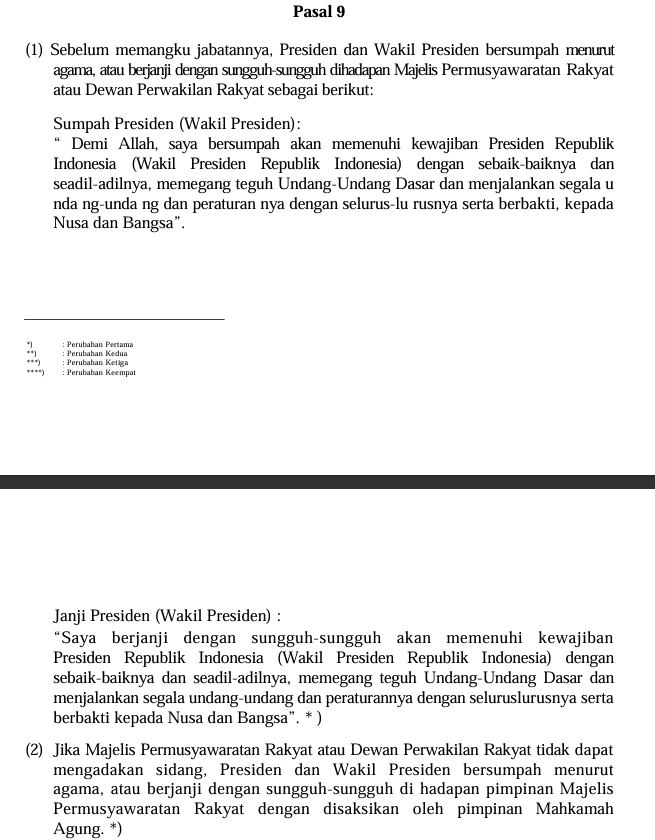

In [28]:
result["source_documents"]

[Document(page_content='*) : Perubahan Pertama\n**) : Perubahan Kedua\n***) : Perubahan Ketiga\n****) : Perubahan KeempatPasal 7\nPresiden dan Wakil Presiden memegang jabatan selama lima tahun, dan\nsesudahnya dapat dipilih kembali dalam jabatan yang sama, hanya untuk satu kali\nmasa jabatan. *)\nPasal 7A\nPresiden dan/atau Wakil Presiden dapat diberhentikan dalam masa jabatannya\noleh Ma jelis Permusyawaratan Rakyat atas usul Dewan Perwakilan Rakyat, baik\napabila terbukti telah melakukan pelanggaran hukum berupa pengkhianatan terhadap\nnegara, korupsi, penyuapan, tindak pidana berat lainnya, atau perbuatan tercela\nmaupun apabila terbukti ti dak lagi memenuhi syarat sebagai Presiden dan/atau Wakil\nPresiden. ***)\nPasal 7B\n(1) Usul pemberhentian Presiden dan/atau Wakil Presiden dapat diajukan oleh Dewan\nPerwakilan Rakyat kepada Majelis Permusyawaratan Rakyat hanya dengan\nterlebih dahulu mengajuk an permintaan kepada Mahkamah Konstitusi untuk\nmemeriksa, mengadili, dan memutus pend

In [29]:
template = """
Kamu adalah seorang analis hukum yang memahami per undang-undangan. \n
kamu akan diberikan text yang berisi undang-undang. \n
Gunakan informasi ini untuk memberikan saran hukum dan jawaban yang sesuai dengan pertanyaan pengguna. \n
Tambahkan informasi terkait letak informasi yang dicari berupa pasal dan ayat. \n
Pengguna memberikan pertanyaan.
Berikan jawaban yang sempurna, dan apa bila tidak tahu jangan menghayal dan katakan tidak tahu
{context}
Question: {question}
Helpful Answer:"""

QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)


In [30]:
question = "Jelaskan fungsi dewan perwakilan rakyat"
result = qa_chain({"query": question})

In [31]:
Markdown(result["result"])

**Fungsi Dewan Perwakilan Rakyat (DPR)**

**Fungsi Legislasi**
* Membentuk undang-undang (Pasal 20 Ayat (1))
* Mengajukan usul rancangan undang-undang (Pasal 21)

**Fungsi Anggaran**
* Menetapkan Anggaran Pendapatan dan Belanja Negara (APBN) bersama dengan Presiden (Pasal 23 Ayat (1))

**Fungsi Pengawasan**
* Melakukan pengawasan terhadap pelaksanaan undang-undang, kebijakan pemerintah, dan kinerja lembaga negara (Pasal 20A Ayat (1))
* Melakukan hak interpelasi, hak angket, dan hak menyatakan pendapat (Pasal 20A Ayat (2))
* Mengajukan pertanyaan, menyampaikan usul dan pendapat, serta memiliki hak imunitas (Pasal 20A Ayat (3))

**Fungsi Lain**
* Memberikan persetujuan terhadap peraturan pemerintah pengganti undang-undang (Perppu) yang ditetapkan Presiden (Pasal 22 Ayat (2))
* Memberikan pertimbangan kepada Presiden atas rancangan undang-undang anggaran pendapatan dan belanja negara (APBN) dan rancangan undang-undang yang berkaitan dengan pajak, pendidikan, dan agama (Pasal 22D Ayat (2))

# Kesimpulan sementara Sebagian betul sebagian ngawang